In [57]:
import pandas as pd
import numpy as np
import sys
import pathlib
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Setup path
project_root = pathlib.Path().resolve().parent
sys.path.append(str(project_root / 'src'))

import util

# Load the train and test datasets
train_df, test_df = util.load_data('../data/train.csv', '../data/test.csv')

train_df.head()

Train shape: (2190, 13), Test shape: (730, 12)


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [59]:
# print duplicate rows
duplicates = train_df[train_df.duplicated()]

In [60]:
# print unique counts
print(train_df.nunique())

id               2190
day               365
pressure          236
maxtemp           219
temparature       198
mintemp           199
dewpoint          218
humidity           49
cloud              78
sunshine          120
winddirection      35
windspeed         223
rainfall            2
dtype: int64


In [61]:
# get nan counts
print(train_df.isnull().sum())

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [62]:
# Assuming util.py is properly imported
summary = util.summarize_dataframe(train_df)
summary.head(20)  # Show first 20 rows of the summary


,Column,Data Type,Non-Null Count,Null Count,Null %,Unique Count,Sample Unique,Min,Max,Mean,Std
0,id,int64,2190,0,0.0,2190,"[0, 1, 2, 3, 4]",0.0,2189.0,1094.500000,632.342866
1,day,int64,2190,0,0.0,365,"[1, 2, 3, 4, 5]",1.0,365.0,179.948402,105.203592
2,pressure,float64,2190,0,0.0,236,"[1017.4, 1019.5, 1024.1, 1013.4, 1021.8]",999.0,1034.6,1013.602146,5.655366
3,maxtemp,float64,2190,0,0.0,219,"[21.2, 16.2, 19.4, 18.1, 21.3]",10.4,36.0,26.365799,5.654330
4,temparature,float64,2190,0,0.0,198,"[20.6, 16.9, 16.1, 17.8, 18.4]",7.4,31.5,23.953059,5.222410
5,mintemp,float64,2190,0,0.0,199,"[19.9, 15.8, 14.6, 16.9, 15.2]",4.0,29.8,22.170091,5.059120
6,dewpoint,float64,2190,0,0.0,218,"[19.4, 15.4, 9.3, 16.8, 9.6]",-0.3,26.7,20.454566,5.288406
7,humidity,float64,2190,0,0.0,49,"[87.0, 95.0, 75.0, 52.0, 79.0]",39.0,98.0,82.036530,7.800654
8,cloud,float64,2190,0,0.0,78,"[88.0, 91.0, 47.0, 95.0, 45.0]",2.0,100.0,75.721918,18.026498
9,sunshine,float64,2190,0,0.0,120,"[1.1, 0.0, 8.3, 3.6, 7.6]",0.0,12.1,3.744429,3.626327


In [63]:
# Visualize missing data
util.plot_missing_data(train_df)


No missing data found!


In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  

# Select the features and target
train_X = train_df.drop(columns=['rainfall'])
train_y = train_df['rainfall']

train_X

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0


In [86]:
from sklearn.feature_selection import VarianceThreshold

# Set your custom threshold (example: 0.01)
threshold_value = 0.0005
selector = VarianceThreshold(threshold=threshold_value)

# Fit the selector to the data
selector.fit(train_X)

# Get the indices of the features that are being kept
kept_indices = selector.get_support(indices=True)

# Create a new dataframe with only the selected features
train_X_selected = train_X.iloc[:, kept_indices]

# Print the shape of the original and new dataframes
print(f"Original shape: {train_X.shape}")
print(f"Selected shape (threshold={threshold_value}): {train_X_selected.shape}")



Original shape: (2190, 11)
Selected shape (threshold=0.0005): (2190, 11)


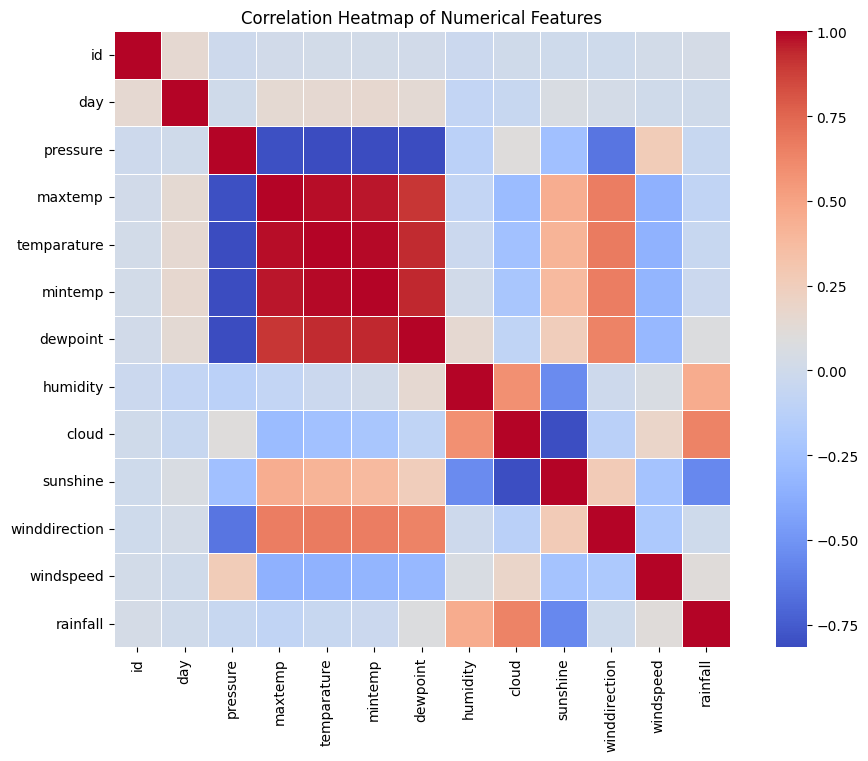

In [66]:
util.plot_correlation_heatmap(train_df)


C:\Users\ronni\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronni\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronni\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronni\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

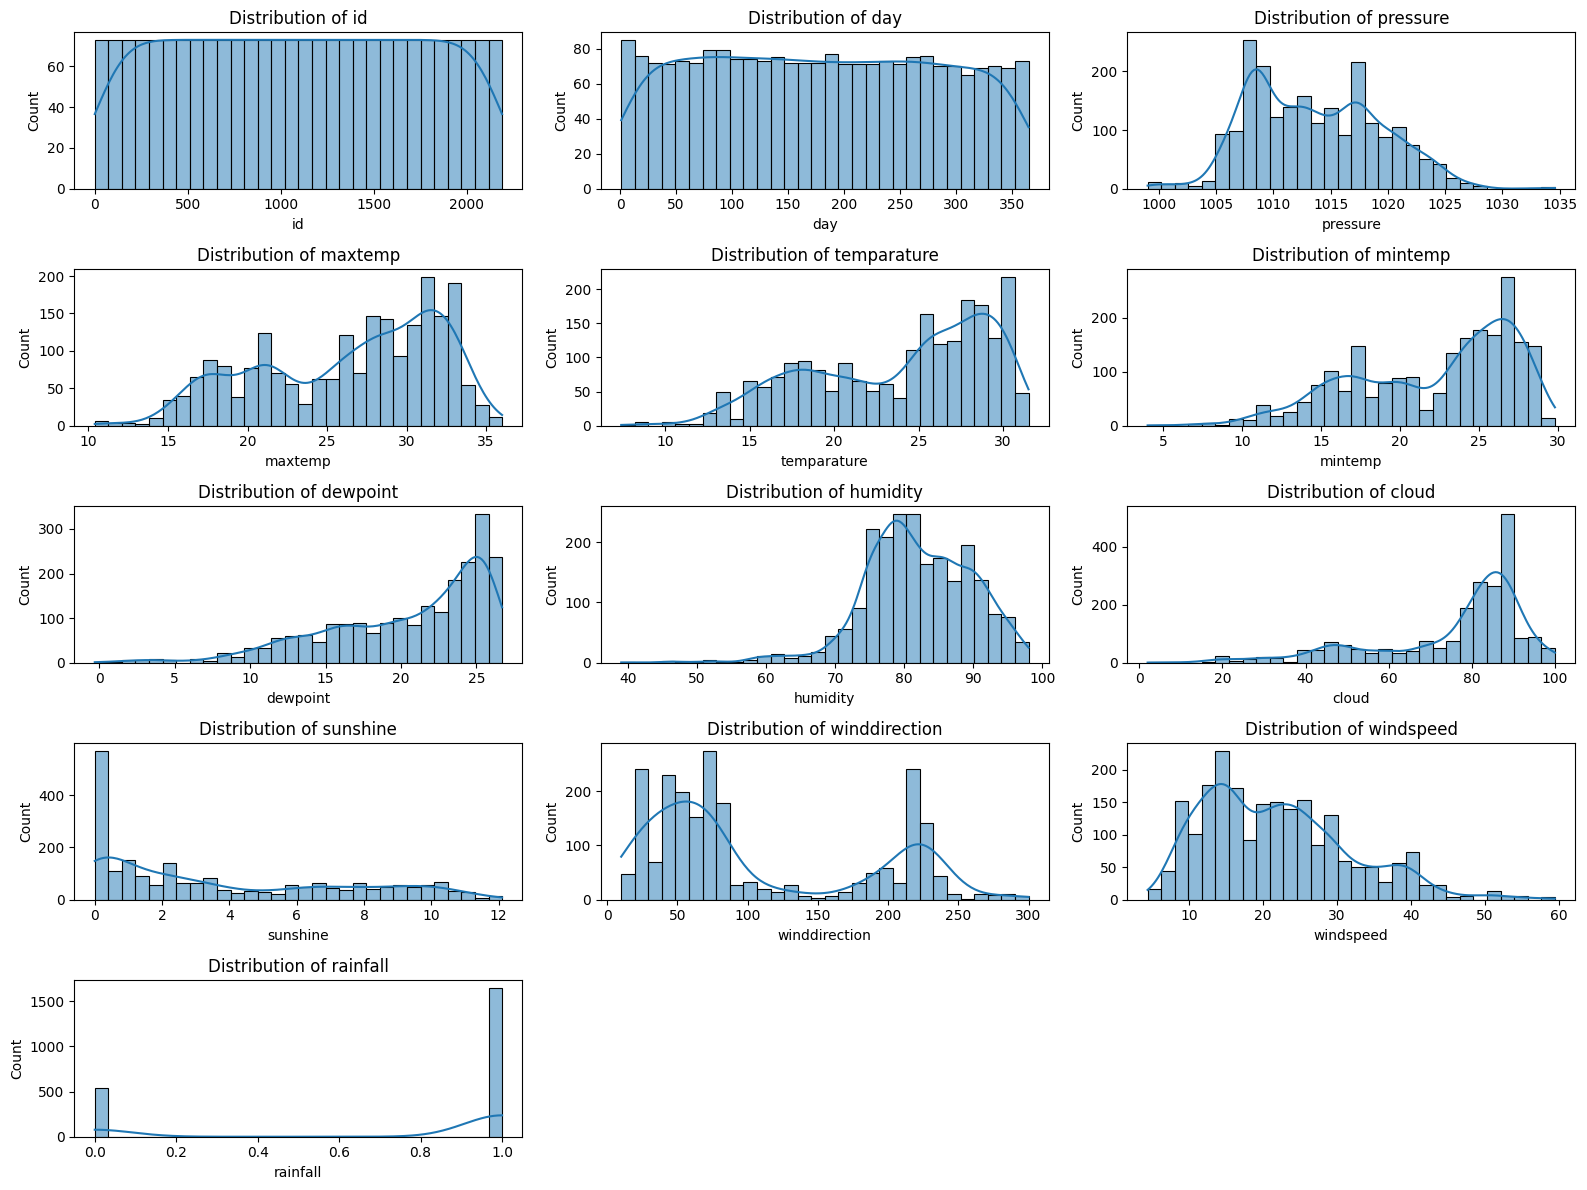

In [67]:
util.plot_numeric_distributions(train_df)


In [68]:
df_clean = util.remove_outliers_iqr(train_df)


In [69]:
df_clean, outliers = util.remove_outliers_iqr(train_df, return_outliers=True)
print("Outliers detected and removed:")
print(outliers.head())


Outliers detected and removed:
        id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
17      17   18    1034.6     17.5         16.2     14.1      11.8      68.0   
383    383   19    1034.6     11.2         10.4      7.0       3.4      77.0   
1828  1828    4    1032.3     17.3         17.3     16.7      16.6      73.0   
1840  1840   16    1034.6     10.4          8.7      7.0       2.4      46.0   
746    746   17    1021.5     12.5          8.5      4.7       2.0      75.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
17     60.0       2.5           50.0       13.4         0  
383    95.0       0.0           40.0       16.0         1  
1828   83.0       0.0           30.0       19.3         1  
1840   19.0      10.0           20.0       34.3         0  
746    69.0       4.3           20.0       19.8         0  


In [70]:
# df_clean = util.remove_outliers_iqr(df, columns=['Age', 'Income'])


In [71]:
# Separate target
target = 'rainfall'
train_y = train_df[target]
train_X = train_df.drop(columns=[target])

In [72]:
# Drop 'id' from both datasets before training
train_X = train_X.drop(columns=['id'])
test_df_no_id = test_df.drop(columns=['id'])  # Keep 'id' safe in test_df for submission

# Preprocess clean datasets
train_X, test_X = util.preprocess_train_test(train_X, test_df_no_id)


In [73]:
# Separate target
target = 'rainfall'
train_y = train_df[target]
train_X = train_df.drop(columns=[target])

# Drop 'id' from feature sets
train_X = train_X.drop(columns=['id'])
test_df_no_id = test_df.drop(columns=['id'])  # Keep 'id' safe for submission



In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Step 1: Calculate variance of each feature
variances = train_X.var().sort_values()

print("\n===== Feature Variance Summary =====")
print(variances.head(10))  # Show lowest 10 variances for inspection
print(f"\nMin variance: {variances.min():.6f}, Max variance: {variances.max():.6f}")

# Step 2: Auto-determine threshold as 10% of median variance (adjustable)
median_variance = variances.median()
threshold_value = 0.1 * median_variance  # You can adjust multiplier (e.g., 0.05 or 0.2)
print(f"\nAuto-selected Variance Threshold: {threshold_value:.6f}")

# Step 3: Apply VarianceThreshold
selector = VarianceThreshold(threshold=threshold_value)
selector.fit(train_X)

# Step 4: Get kept and removed columns
kept_columns = train_X.columns[selector.get_support()]
removed_columns = train_X.columns[~selector.get_support()]

# Step 5: Create new reduced DataFrame
train_X_selected = train_X[kept_columns]

# Step 6: Print summary
print(f"\nOriginal shape: {train_X.shape}")
print(f"New shape after variance thresholding: {train_X_selected.shape}")
print(f"Removed {len(removed_columns)} low-variance columns: {removed_columns.tolist()}")


In [74]:
# Preprocess
train_X, test_X = util.preprocess_train_test(train_X, test_df_no_id)
test_X = util.align_columns(train_X, test_X)  # Optional, if needed

In [75]:
# Define and train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(train_X, train_y)


LogisticRegression(max_iter=1000, solver='liblinear')

In [76]:

# Predict
test_preds = util.predict_test(model, test_X, features=train_X.columns.tolist())

# Write submission (keeping original 'id' column)
util.write_submission(test_df, test_preds, id_column='id', output_path='submission.csv', prediction_column='rainfall')

Submission file written to: submission.csv


In [77]:
# print cross val rmse
# Cross-validation
util.cross_validate_classification(model, train_X, train_y, n_splits=5, stratify=True)

Fold 1 Accuracy: 0.8995
Fold 2 Accuracy: 0.8470
Fold 3 Accuracy: 0.8425
Fold 4 Accuracy: 0.8607
Fold 5 Accuracy: 0.8699

Average Accuracy: 0.8639


(0.8639269406392694,
 [0.8995433789954338,
  0.8470319634703196,
  0.8424657534246576,
  0.860730593607306,
  0.8698630136986302])